# Classification of Cow's movement
### in this project we classified nine genral movements by a cow using imu dataset
### traning dataset is eighty percent of total data used to train multi level classification model
### Prominent machine learning algoritms were implemted comparing their accuracy after EDA, data    preprocessing and scaling the featur variables

In [ ]:
#importing libries and reading csv in asingle dataframe

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [26]:
warnings.filterwarnings('ignore')

In [27]:
df1=pd.read_csv(r'C:\Users\jahaa\Downloads/E1_train.csv')
df2=pd.read_csv(r'C:\Users\jahaa\Downloads/D2_train.csv')
df3 = pd.read_csv(r'C:\Users\jahaa\Downloads/W3_train.csv')
df4 = pd.read_csv(r'C:\Users\jahaa\Downloads/S4_train.csv')
df5 = pd.read_csv(r'C:\Users\jahaa\Downloads/L5_train.csv')
df6 = pd.read_csv(r'C:\Users\jahaa\Downloads/RS6_train.csv')
df7 = pd.read_csv(r'C:\Users\jahaa\Downloads/RL7_train.csv')
df8 = pd.read_csv(r'C:\Users\jahaa\Downloads/G8_train.csv')
df9 = pd.read_csv(r'C:\Users\jahaa\Downloads/I9_train.csv')

In [28]:
df =pd.concat( [df1,df2,df3,df4,df5,df6,df7,df8,df9])

In [29]:
df.head(3)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628308980,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5,1
1,1628308980,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5,1
2,1628308980,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5,1


# EDA( Exploratory Data Analysis)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263524 entries, 0 to 405262
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


In [ ]:
# visualizing the distribution of values of feature variables using boxplot

In [31]:
outlined=['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']

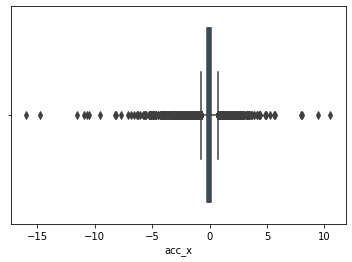

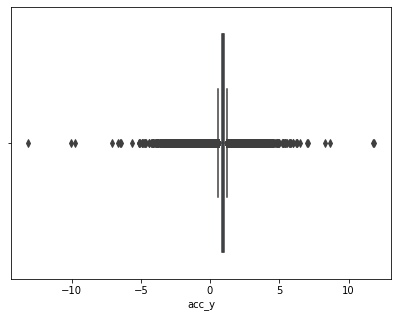

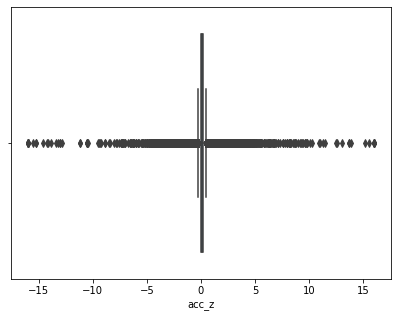

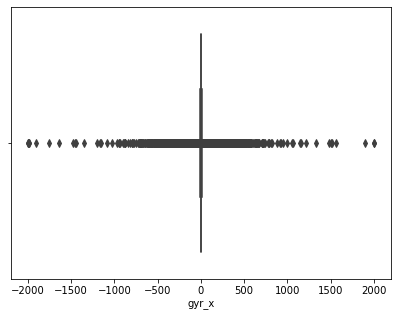

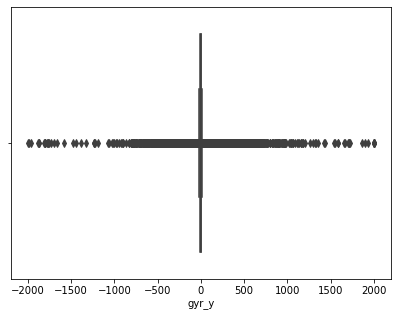

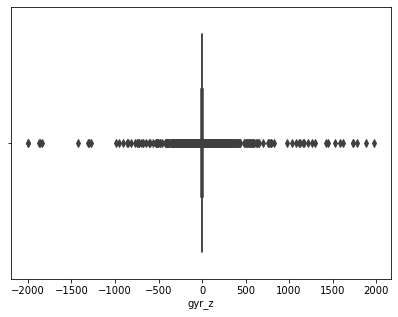

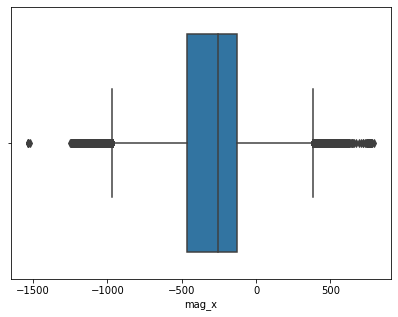

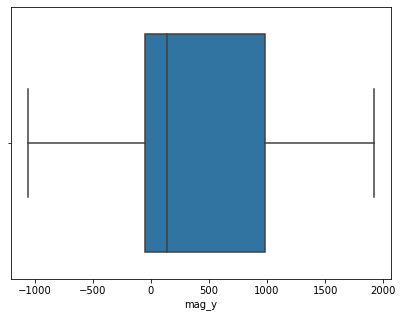

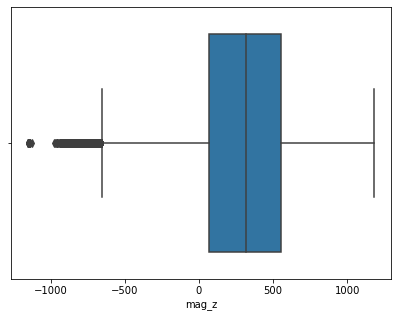

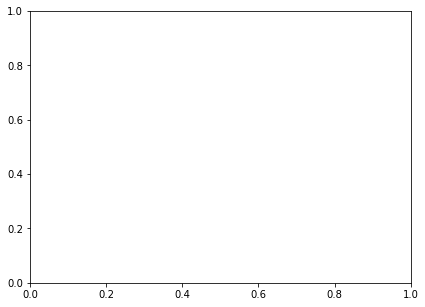

In [32]:
def plot(df,var):
    sns.boxplot(df[var])
    plt.figure(figsize=(15,5))
    plt.subplot(121)
for col in outlined:
    plot(df,col)

In [33]:
df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628308980,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5,1
1,1628308980,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5,1
2,1628308980,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5,1
3,1628308980,0.225098,0.958008,-0.031250,19.104004,23.803711,7.019043,-297.0,1431.0,523.5,1
4,1628308980,0.204590,0.961426,-0.001953,15.258789,23.193359,2.807617,-286.5,1431.0,538.5,1
...,...,...,...,...,...,...,...,...,...,...,...
405258,1628341587,0.517090,0.680176,-0.476074,-0.244141,-3.479004,-3.356934,-984.0,663.0,880.5,9
405259,1628341587,0.516113,0.686523,-0.475586,0.854492,-3.967285,-3.723145,-984.0,660.0,867.0,9
405260,1628341587,0.519043,0.693359,-0.488770,0.671387,-3.417969,-4.150391,-991.5,667.5,874.5,9
405261,1628341587,0.520508,0.687988,-0.482422,-0.244141,-3.051758,-3.417969,-987.0,663.0,865.5,9


In [ ]:
# since the interquantile range of many variables in very thin as well as the IQR tells us that the data is unbalanced
# and by doing some prework I found out that half of our valuable data will be lost if we remove outliners and labels will be from 1 to 5 only

In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time     229095.000000
acc_x         0.379883
acc_y         0.145508
acc_z         0.168945
gyr_x         5.737305
gyr_y         7.568359
gyr_z         4.150391
mag_x       337.500000
mag_y      1029.000000
mag_z       483.000000
label         5.000000
dtype: float64


In [35]:
df.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

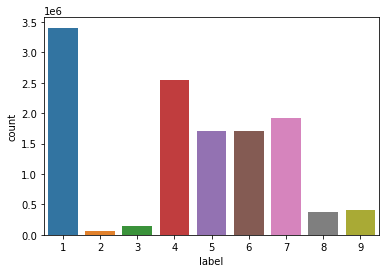

In [37]:
sns.countplot(x='label',data=df)

# Data Preprocessing and Plotting scaled values

In [38]:
X = df.drop(columns =['label','time'],axis=1)


In [40]:
Y = df['label']

In [41]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
405258    9
405259    9
405260    9
405261    9
405262    9
Name: label, Length: 12263524, dtype: int64

In [ ]:
# Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance) 
#It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

In [29]:
from sklearn.preprocessing import StandardScaler


In [31]:
def plots(df,var,t):
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after'+str(t))


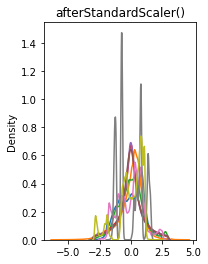

In [32]:
for col in X[outlined].columns:
    plots(X[outlined],col,StandardScaler())

In [ ]:
# standardscaler didnot work well and the data is skewed 

In [ ]:
# A quantile transform will map a variable’s probability distribution to another probability distribution. 

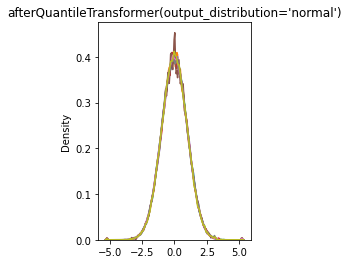

In [33]:
from sklearn.preprocessing import QuatileTransform
for col in X[outlined].columns:
    plots(X[outlined],col,QuantileTransformer(output_distribution = 'normal'))

In [ ]:
# it scaled the data in gussian probabily distribution

# Training and Testing Models

In [43]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
X = quantile.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state =0,shuffle=True,test_size = 0.2)

In [45]:
x_train

array([[-0.46680326,  0.10684126,  0.40199502, ...,  1.49543302,
        -0.77483284,  1.26128216],
       [ 0.1397103 ,  1.30706337, -0.23808933, ...,  0.3628503 ,
         0.05271629, -0.04643572],
       [-0.45564031,  1.32194584,  0.4403831 , ...,  1.1328976 ,
        -0.94757994, -0.00752748],
       ...,
       [-1.00621052, -1.24932869, -0.21491982, ..., -0.00878209,
        -3.15830563, -0.49780908],
       [ 0.60746322,  0.84807465, -0.62414474, ...,  0.41426686,
        -1.10013967,  1.03793719],
       [-0.2406714 , -2.00152288,  1.05968201, ...,  0.37090175,
        -0.33750567, -1.69492268]])

In [46]:
y_train

1197009    4
1841953    4
893802     6
166236     8
218152     8
          ..
1077389    7
1552189    4
2215104    1
1484405    1
468801     6
Name: label, Length: 9810819, dtype: int64

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
from sklearn import metrics
from sklearn.metrics import f1_score
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Gaussian Naive Bayes model f1_score:", f1_score(y_test, y_pred,average='weighted'))


Gaussian Naive Bayes model accuracy(in %): 47.98440905041576
Gaussian Naive Bayes model f1_score: 0.450687904906263


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred1=knn_clf.predict(x_test)


In [58]:
print("Kneighbour model accuracy(in %):", metrics.accuracy_score(y_test, ypred1)*100)
print("Kneighbour model f1_score:", f1_score(y_test, ypred1,average='weighted'))

Kneighbour model accuracy(in %): 86.86817207939805
Kneighbour model f1_score: 0.8664637686303941


In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, dtree_predictions)*100)
print("Decision Tree model f1_score:", f1_score(y_test, dtree_predictions,average='weighted'))

Decision Tree model accuracy(in %): 40.495086037660464
Decision Tree model f1_score: 0.29836495402944296


# As we can see our knn classifier predicts to 86% of accuracy of the respective labels

# This is my Submitting to Ranchpal Short assesment 
# Regards Jahaan Singh
### singhjahaan8@gmail.com